In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import zipfile
zip_ref = zipfile.ZipFile('/content/18650_8W_new.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [3]:
metadata = pd.read_excel('/content/18650_8W_new/Metadata.xlsx')

In [4]:
metadata

,Cycle Index,Chg. Cap.(Ah),DChg. Cap.(Ah),Chg.-DChg. Eff(%),Chg. Energy(Wh),DChg. Energy(Wh),Chg. Time,DChg. Time,File name,SoH
0,1,0.000007,0.180073,2.551655e+06,0.000027,0.648198,120000,266100,cyc1,87.57
1,2,0.000008,0.181198,2.382798e+06,0.000029,0.648507,120000,330000,cyc2,86.95
2,3,0.000006,0.182153,2.843781e+06,0.000025,0.648289,120000,270000,cyc3,86.43
3,4,0.000007,0.182976,2.796626e+06,0.000025,0.648463,120000,300000,cyc4,85.98
4,5,0.000007,0.183254,2.632105e+06,0.000027,0.648560,120000,330000,cyc5,85.83
5,6,0.000007,0.183660,2.703146e+06,0.000026,0.648403,120000,300000,cyc6,85.62
6,7,0.000008,0.184844,2.356170e+06,0.000030,0.648320,120000,360000,cyc7,84.99
7,8,0.000008,0.184464,2.384562e+06,0.000030,0.648837,120000,330000,cyc8,85.19
8,9,0.000007,0.185675,2.664772e+06,0.000027,0.648522,120000,300000,cyc9,84.55
9,10,0.000008,0.185995,2.463760e+06,0.000029,0.648806,120000,360000,cyc10,84.39


<ipython-input-17-fd0fc229506f>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  battery_data['Time'] = pd.to_datetime(battery_data['Time'])
<ipython-input-17-fd0fc229506f>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  battery_data['Time'] = pd.to_datetime(battery_data['Time'])
<ipython-input-17-fd0fc229506f>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  battery_data['Time'] = pd.to_datetime(battery_data['Time'])
<ipython-input-17-fd0fc229506f>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensur

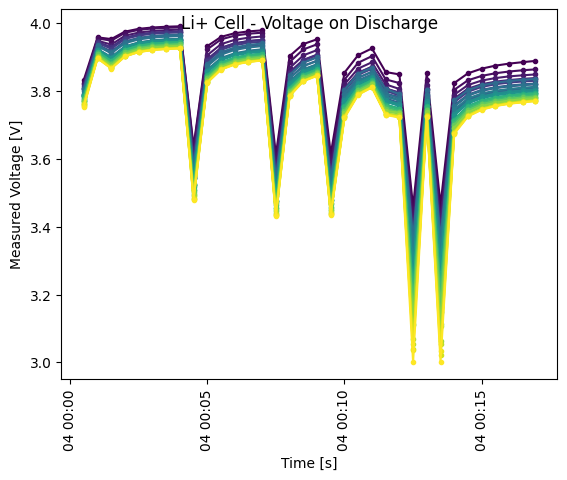

In [17]:
BATTERY_ID = "Li+ Cell"
filenames = metadata['File name'].tolist()

cycle = 1
N = len(filenames)
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,N)))
fig, ax = plt.subplots()

for filename in filenames:
    battery_data = pd.read_excel(f"/content/18650_8W_new/{filename}.xlsx")
    battery_data.drop(0, inplace=True)
    battery_data['Time'] = pd.to_datetime(battery_data['Time'])
    ax.plot(battery_data["Time"], battery_data["Voltage(V)"], marker='.', label=cycle)
    cycle += 1

#plt.ylim(2.3,4.5)
#plt.xlim(0,3900)
plt.xlabel("Time [s]")
plt.xticks(rotation=90)
plt.ylabel("Measured Voltage [V]")
plt.rcParams['axes.titley'] = 1.0 # title inside
plt.rcParams['axes.titlepad'] = -14  # pad is in points...
plt.title(f"{BATTERY_ID} - Voltage on Discharge")
plt.show()

In [122]:
# Average voltage drop in percent in Voltage(V)

voltage_drops = []
for filename in filenames:
  battery_data = pd.read_excel(f"/content/18650_8W_new/{filename}.xlsx")
  battery_data.drop(0, inplace=True)
  voltage_drop = (battery_data["Voltage(V)"].iloc[-1] - battery_data["Voltage(V)"].iloc[0]) / battery_data["Voltage(V)"].iloc[0] * 100
  voltage_drops.append(voltage_drop)

average_voltage_drop = np.mean(voltage_drops)
print(f"Average voltage drop: {average_voltage_drop:.2f}%")


Average voltage drop: 0.50%


<ipython-input-11-4c626d4be612>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  battery_data['Time'] = pd.to_datetime(battery_data['Time'])
<ipython-input-11-4c626d4be612>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  battery_data['Time'] = pd.to_datetime(battery_data['Time'])
<ipython-input-11-4c626d4be612>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  battery_data['Time'] = pd.to_datetime(battery_data['Time'])
<ipython-input-11-4c626d4be612>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure pa

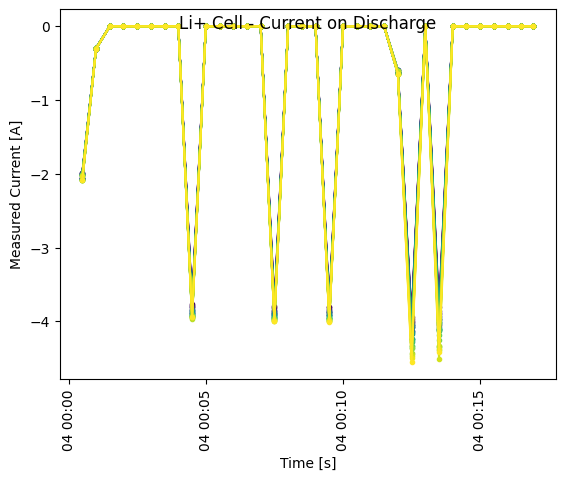

In [11]:
# Plot current vs time during discharging cycle
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,N)))
fig, ax = plt.subplots()

for filename in filenames:
    battery_data = pd.read_excel(f"/content/18650_8W_new/{filename}.xlsx")
    battery_data['Time'] = pd.to_datetime(battery_data['Time'])
    battery_data.drop(0, inplace=True)
    ax.plot(battery_data["Time"], battery_data["Current(A)"], marker='.', label=cycle)
    cycle += 1

plt.xlabel("Time [s]")
plt.xticks(rotation=90)
plt.ylabel("Measured Current [A]")
plt.rcParams['axes.titley'] = 1.0 # title inside
plt.rcParams['axes.titlepad'] = -14  # pad is in points...
plt.title(f"{BATTERY_ID} - Current on Discharge")
plt.show()


<ipython-input-13-1fe35b253c00>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  battery_data['Time'] = pd.to_datetime(battery_data['Time'])
<ipython-input-13-1fe35b253c00>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  battery_data['Time'] = pd.to_datetime(battery_data['Time'])
<ipython-input-13-1fe35b253c00>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  battery_data['Time'] = pd.to_datetime(battery_data['Time'])
<ipython-input-13-1fe35b253c00>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure pa

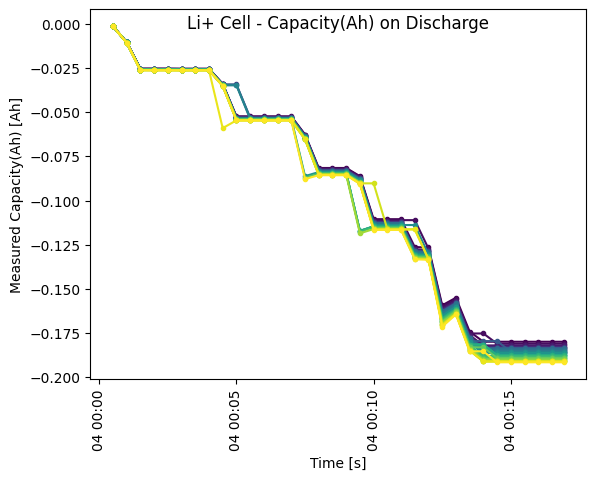

In [13]:
# Plot Capacity(Ah) vs time during discharging cycle
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,N)))
fig, ax = plt.subplots()

for filename in filenames:
    battery_data = pd.read_excel(f"/content/18650_8W_new/{filename}.xlsx")
    battery_data.drop(0, inplace=True)
    battery_data['Time'] = pd.to_datetime(battery_data['Time'])
    ax.plot(battery_data["Time"], battery_data["Capacity(Ah)"], marker='.', label=cycle)
    cycle += 1

plt.xlabel("Time [s]")
plt.xticks(rotation=90)
plt.ylabel("Measured Capacity(Ah) [Ah]")
plt.rcParams['axes.titley'] = 1.0 # title inside
plt.rcParams['axes.titlepad'] = -14  # pad is in points...
plt.title(f"{BATTERY_ID} - Capacity(Ah) on Discharge")
plt.show()


<ipython-input-16-04396276432d>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  battery_data['Time'] = pd.to_datetime(battery_data['Time'])
<ipython-input-16-04396276432d>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  battery_data['Time'] = pd.to_datetime(battery_data['Time'])
<ipython-input-16-04396276432d>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  battery_data['Time'] = pd.to_datetime(battery_data['Time'])
<ipython-input-16-04396276432d>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensur

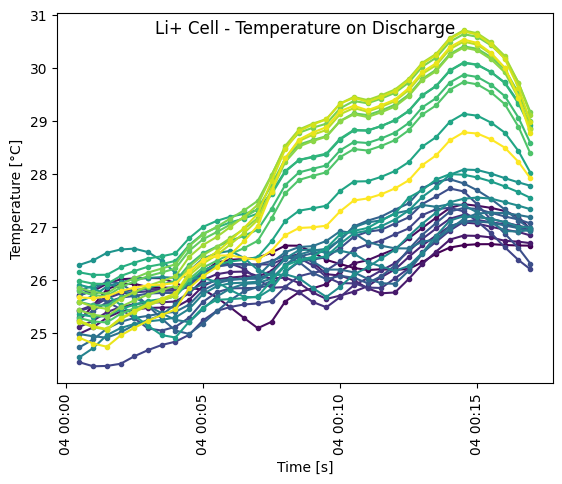

In [16]:
 # Plot Averaged Temperature vs time during discharging cycle

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,30)))
fig, ax = plt.subplots()

for cycle in range(1, 31):
    filename = f"/content/18650_8W_new/cyc{cycle}.xlsx"
    battery_data = pd.read_excel(filename)
    battery_data.drop(0, inplace=True)
    battery_data['Time'] = pd.to_datetime(battery_data['Time'])
    ax.plot(battery_data["Time"], battery_data["Averaged Temperature"], marker='.', label=cycle)

plt.xlabel("Time [s]")
plt.xticks(rotation=90)
plt.ylabel("Temperature [°C]")
plt.rcParams['axes.titley'] = 1.0 # title inside
plt.rcParams['axes.titlepad'] = -14  # pad is in points...
plt.title(f"{BATTERY_ID} - Temperature on Discharge")
plt.show()


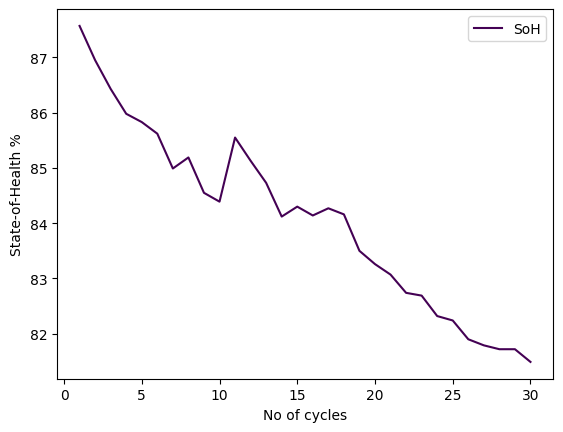

In [18]:

plt.plot(metadata['Cycle Index'], metadata['SoH'], label='SoH')
plt.xlabel('No of cycles')
plt.ylabel('State-of-Health %')
plt.legend()
plt.show()


In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

In [45]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Define the separator function
def separator(file):
    df = pd.read_excel(f'/content/18650_8W_new/{file}.xlsx')
    df = df[['Voltage(V)', 'Current(A)', 'Averaged Temperature']]
    df = df.dropna()
    return df
    n_rows = len(df)
    patch_size = n_rows // 35

    averaged_df = pd.DataFrame()

    for i in range(35):
        start_index = i * patch_size
        if i == 34:  # Last patch includes all remaining rows
            end_index = n_rows
        else:
            end_index = start_index + patch_size

        patch = df.iloc[start_index:end_index]
        averaged_patch = patch.mean(axis=0)

        averaged_df[i] = averaged_patch

    averaged_df = averaged_df.transpose()

    return averaged_df

In [46]:
# List of discharge file names
discharge_files = metadata["File name"][:].tolist()

capacity_data_list = metadata ["SoH"][:].tolist()

# Initialize an empty list to store the input data
input_data = []

# Process each discharge file and combine the results
for file in discharge_files:
    averaged_df = separator(file)
    input_data.append(averaged_df.values)

# Convert input_data to a numpy array for model training
input_data = np.array(input_data).astype(np.float32)  # Ensure input_data is of type float32

# Convert output data to a numpy array for model training
output_data = np.array(capacity_data_list).astype(np.float32)  # Ensure output_data is of type float32

# Check the shape of the input data and output data
print(input_data.shape)  # Should be (num_files, 35, 3)
print(output_data.shape)  # Should be (num_files,)

(30, 35, 3)
(30,)


In [101]:
split = int(len(input_data) * 0.7)
X_train, X_test = input_data[:split], input_data[split:]
y_train, y_test = output_data[:split], output_data[split:]

# Print the shapes of the training and testing sets
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (21, 35, 3)
y_train shape: (21,)
X_test shape: (9, 35, 3)
y_test shape: (9,)


In [48]:
# Reshape the training data to 2D for MinMaxScaler
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)  # (num_files, 35 * 3)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

# Instantiate the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the reshaped training data
scaler.fit(X_train_reshaped)

# Transform the reshaped training and testing data
X_train_normalized = scaler.transform(X_train_reshaped)
X_test_normalized = scaler.transform(X_test_reshaped)

# Reshape the normalized data back to 3D for the LSTM model
X_train_normalized = X_train_normalized.reshape(X_train.shape)
X_test_normalized = X_test_normalized.reshape(X_test.shape)

# Print the shapes of the normalized training and testing data
print(f"X_train_normalized shape: {X_train_normalized.shape}")
print(f"X_test_normalized shape: {X_test_normalized.shape}")

X_train_normalized shape: (27, 35, 3)
X_test_normalized shape: (3, 35, 3)


In [49]:
!pip install keras-tuner -q

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from kerastuner import HyperParameters
from kerastuner.tuners import Hyperband

def model_builder(hp):
  model = Sequential()
  model.add(LSTM(units=hp.Int('units',
                                min_value=32,
                                max_value=128,
                                step=32),
                activation='relu',
                return_sequences=True,
                input_shape=(X_train.shape[1], X_train.shape[2])))

  model.add(LSTM(units=hp.Int('units_2',
                                min_value= 8,
                                max_value=128,
                                step=16),
                activation='relu'))

  model.add(Dense(units=1))
  model.compile(optimizer='adam', loss='mean_squared_error')
  return model

tuner = Hyperband(model_builder,
                     objective='val_loss',
                     max_epochs=10)
tuner.search(X_train, y_train, epochs=20, validation_data=(X_test, y_test), verbose=2)

best_model = tuner.get_best_models()[0]
best_model.summary()


Reloading Tuner from ./untitled_project/tuner0.json
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 35, 32)            4608      
                                                                 
 lstm_1 (LSTM)               (None, 88)                42592     
                                                                 
 dense (Dense)               (None, 1)                 89        
                                                                 
Total params: 47289 (184.72 KB)
Trainable params: 47289 (184.72 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [96]:
model2 = Sequential()

model2.add(LSTM(units=27, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))

model2.add(LSTM(units=95, activation='relu'))
model2.add(Dense(units=1))

# Compile the model
model2.compile(optimizer='adam', loss='mean_squared_error')
history = model2.fit(X_train, y_train, epochs=250, batch_size=12)

# Print the model summary
model2.summary()

Epoch 1/250
3/3 [==============================] - 4s 27ms/step - loss: 5210.2822
Epoch 2/250
3/3 [==============================] - 0s 31ms/step - loss: 633.6662
Epoch 3/250
3/3 [==============================] - 0s 28ms/step - loss: 1074.1915
Epoch 4/250
3/3 [==============================] - 0s 31ms/step - loss: 272.7679
Epoch 5/250
3/3 [==============================] - 0s 33ms/step - loss: 48.8963
Epoch 6/250
3/3 [==============================] - 0s 29ms/step - loss: 43.9428
Epoch 7/250
3/3 [==============================] - 0s 28ms/step - loss: 22.1081
Epoch 8/250
3/3 [==============================] - 0s 34ms/step - loss: 77.7215
Epoch 9/250
3/3 [==============================] - 0s 29ms/step - loss: 46.6756
Epoch 10/250
3/3 [==============================] - 0s 30ms/step - loss: 45.1395
Epoch 11/250
3/3 [==============================] - 0s 31ms/step - loss: 41.9904
Epoch 12/250
3/3 [==============================] - 0s 28ms/step - loss: 26.2390
Epoch 13/250
3/3 [=============

1/1 [==============================] - 0s 309ms/step


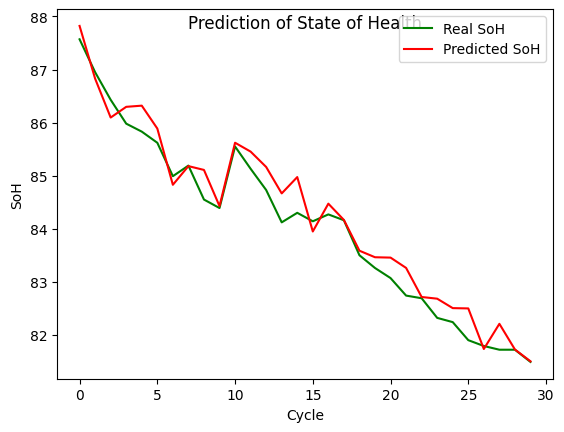

In [97]:
y_pred = model2.predict(input_data)
plt.plot(output_data, color='g', label='Real SoH')
plt.plot(y_pred, color='r', label='Predicted SoH')
plt.title('Prediction of State of Health')
plt.xlabel('Cycle')
plt.ylabel('SoH')
plt.legend()
plt.show()

In [98]:
# prompt: find mean absolute percentage error, mean absolute error, root mean squared error

import numpy as np
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

# Calculate the mean absolute percentage error (MAPE)
mape = mean_absolute_percentage_error(output_data, y_pred) * 100

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(output_data, y_pred)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(output_data, y_pred))

# Print the results
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Absolute Percentage Error (MAPE): 0.32%
Mean Absolute Error (MAE): 0.27
Root Mean Squared Error (RMSE): 0.33


In [113]:
pred_list = output_data[:-15].tolist() + model2.predict(X_test).tolist()

1/1 [==============================] - 0s 27ms/step


In [103]:
# prompt: create a list with 21 nan and after that  model2.predict(X_test)

nan_list = [np.nan] * 21
pred_list = nan_list + model2.predict(X_test).tolist()


1/1 [==============================] - 0s 35ms/step


In [116]:
power_cycle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10162 entries, 0 to 10161
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Time                  10162 non-null  float64
 1   Unnamed: 1            0 non-null      float64
 2   time                  10162 non-null  float64
 3   PT.PwrSupply.HV1.Pwr  10162 non-null  float64
dtypes: float64(4)
memory usage: 317.7 KB


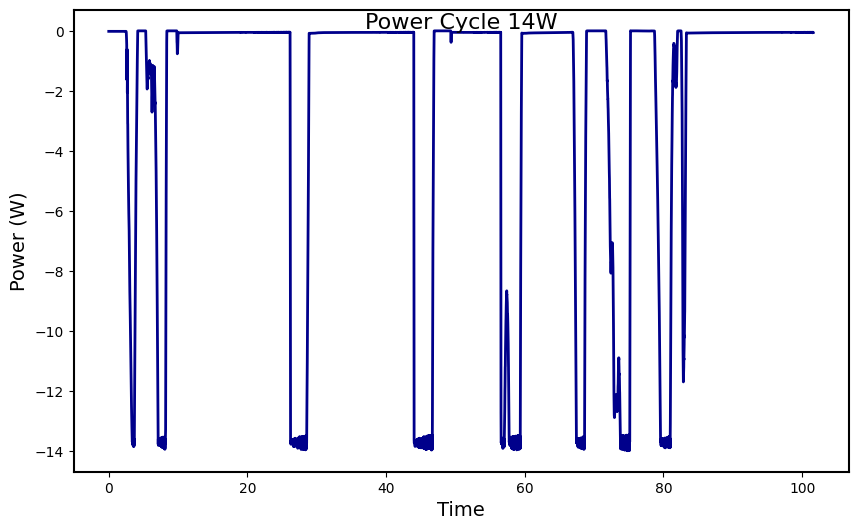

In [121]:

import matplotlib.pyplot as plt

# Extract data from the power_cycle DataFrame
time = power_cycle['Time'].to_numpy()
power = power_cycle['PT.PwrSupply.HV1.Pwr'].to_numpy()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(time, power, color='darkblue', linewidth=2)

# Add labels and title
plt.xlabel('Time', fontsize=14)
plt.ylabel('Power (W)', fontsize=14)
plt.title('Power Cycle 14W', fontsize=16)

# Show the plot
plt.show()
